#### <h1><center>Machine Learning</center></h1>

<center><img src="img/title.jpg" align="center"/></center>


<h3 style="color:blue;"><center>Instructor: Fereydoon Vafaei</center></h3>


<h5 style="color:purple;"><center>Regression and Gradient Descent</center></h5>

<center><img src="img/UMBC_logo.png" align="center"/></center>

<h1><center>Agenda</center></h1>

- Linear Regression

- Performance Measures
    - MSE
    - MAE

- Polynomial Regression

- Bias Variance Tradeoff

- Regularized Regression
    - Ridge Regression
    - Lasso Regression
    - Elastic Net

- Gradient Descent

- Logistic Regression

<h1><center>Linear Regression</center></h1>

- The simplest model to predict a continuous (numerical) value.


- Two approaches:
    - Closed Form Solution - Normal Equation (aka Least Squares)
    - Optimization Solution - Least Mean Squares using Gradient Descent

<h1><center>Linear Regression - Math Notation</center></h1>

**Equation 4-1: Linear Regression model prediction**

$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$


**Equation 4-2: Linear Regression model prediction (vectorized form)**

$
\hat{y} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x} = \boldsymbol{\theta}^T \mathbf{x}
$

<h1><center>Linear Regression - Performance Measure</center></h1>

**Equation 4-3: Mean Squared Error MSE cost function for a Linear Regression model**

$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$

m is number of instances


**Equation 2-2: Mean Absolute Error MAE**

$
\text{MAE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \frac{1}{m}\sum\limits_{i=1}^{m}\left| \boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right|
$

<h1><center>Linear Regression - Closed Form Solution</center></h1>

**Equation 4-4: Normal Equation**

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$

In this equation:

- $\hat{\boldsymbol{\theta}}$ is the value of $\theta$ that minimizes the cost function.

- y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print(X[0])
print(y[0])

[1.7134706]
[10.69720933]


(0.0, 2.0, 0.0, 15.0)

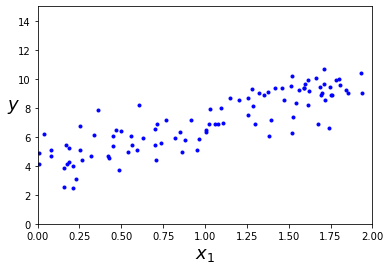

In [2]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Normal Equation

theta_best

array([[4.06529331],
       [2.95923205]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06529331],
       [9.98375742]])

(0.0, 2.0, 0.0, 15.0)

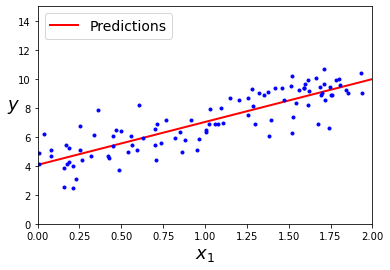

In [5]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

In [6]:
# Now let's do linear regression using scikitlearn 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.06529331]), array([[2.95923205]]))

In [7]:
lin_reg.predict(X_new)

array([[4.06529331],
       [9.98375742]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.06529331],
       [2.95923205]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.06529331],
       [2.95923205]])

<h1><center> <font color="blue">Active Learning</font>: Regression Performance Measures</center></h1>

>Calculate [MSE and MAE for this Regression problem](Regression-ClassActivity.png).

<h1><center>Non-Linear Regression - Polynomial Regression</center></h1>

- To recognize the non-linear patterns of the dataset, the regression model should account for non-linearity.


- A simple way of adding non-linearity to a regression model is **Polynomial Regression**.


- To do this, you should add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called **Polynomial Regression**.

In [10]:
# Let's generate some non-linear data
import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

print(X[0])
print(y[0])

[-0.75275929]
[1.61761105]


(-3.0, 3.0, 0.0, 10.0)

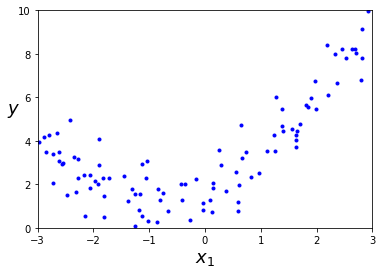

In [11]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [12]:
# Clearly, a straight line will never fit this data properly.
# So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data,
# adding the square (second-degree polynomial) of each feature in the training set as a new feature.
# In this case there is just one feature.

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [13]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [14]:
# X_poly now contains the original feature of X plus the square of this feature.
# Now you can fit a LinearRegression model to this extended training data:

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

(-3.0, 3.0, 0.0, 10.0)

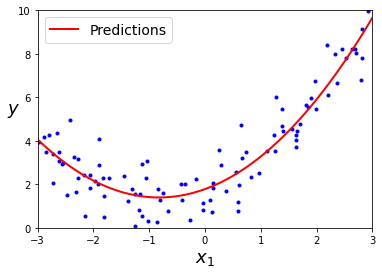

In [15]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

<h1><center>Polynomial Regression</center></h1>

- Note that when there are multiple features, **Polynomial Regression** is capable of finding relationships between features (which is something a plain Linear Regression model cannot do).


- This is made possible by the fact that `PolynomialFeatures` also adds all combinations of features up to the given degree.


- For example, if there were two features $a$ and $b$, `PolynomialFeatures` with `degree=3` would not only add the features $a^2$ , $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

$ O(\frac{1}{\text{iterations}}) $


$ \hat{y} = 0.56 x_1^2 + 0.93 x_1 + 1.78 $


$ y = 0.5 x_1^2 + 1.0 x_1 + 2.0 + \text{Gaussian noise} $


$ \dfrac{(n+d)!}{d!\,n!} $


$ \alpha \sum_{i=1}^{n}{{\theta_i}^2}$

<h1><center>High-Degree Polynomial</center></h1>

- If you perform high-degree **Polynomial Regression**, you will likely fit the training data much better than with plain Linear Regression.


- For example, the following cell applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial).

(-3.0, 3.0, 0.0, 10.0)

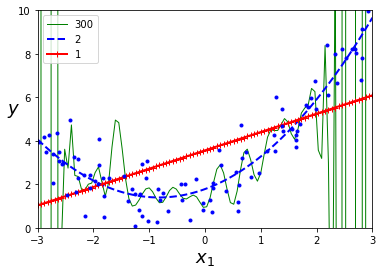

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

<h1><center>Overfitting vs Underfitting</center></h1>

- This **high-degree Polynomial Regression** model is severely **overfitting** the training data, while the linear model is underfitting it.

- The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model.

- But in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

- If a model performs well on the training data but generalizes poorly according to the **cross validation** metrics, then your model is **overfitting**. If it performs poorly on both, then it is **underfitting**.

- This is one way to tell when a model is **too simple** or **too complex**.

<center><img src="img/fig-4-14.png" align="center"/></center>

<h1><center>Learning Curves</center></h1>

- Another way to tell if **overfitting** or **underfitting** occurs is to look at the **learning curves**---plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration).


- To generate the plots, train the model several times on different sized subsets of the training set.


- The following code defines a function that, given some training data, plots the **learning curves** of a model.

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)             

(0.0, 80.0, 0.0, 3.0)

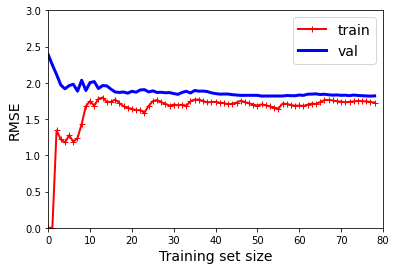

In [19]:
# The learning curves of the plain Linear Regression model---a straight line

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])    

<h1><center>Learning Curves - Underfitting</center></h1>

- First, let’s look at the performance on the **training data**:
    - When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all.

    - So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.

- Now let’s look at the performance of the model on the **validation data**:
    - When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.
    
    - These learning curves are typical of a model that’s **underfitting**. Both curves have reached a **plateau**; they are close and fairly high.
    
<center><img src="img/fig-4-15.png" align="center"/></center>

<h1><center>How to Resolve Underfitting</center></h1>

- If your model is underfitting the training data, adding more training examples will generally NOT help. You need to use a more **complex model** or come up with **better features**.

(0.0, 80.0, 0.0, 3.0)

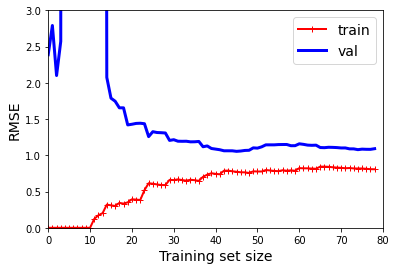

In [20]:
# Now let’s look at the learning curves of a 10th-degree polynomial model on the same data

from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])      

<h1><center>Learning Curves - Overfitting</center></h1>

- These learning curves look a bit like the previous ones, but there are two very important differences:
    - The error on the training data is much lower than with the Linear Regression model.
    - There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an **overfitting** model.
    - If you used a much larger training set, however, the two curves would continue to get closer.

<center><img src="img/fig-4-16.png" align="center"/></center>

<h1><center>How to Resolve Overfitting</center></h1>

- One way to improve an **overfitting** model is to feed it more training data until the validation error reaches the training error.


- The other way is to select a simpler model, e.g. a lower-degree **Polynomial Regression**.


- You may also use other ML techniques such as **Regularization** to resolve **overfitting**.

<h1><center>Bias Variance Trade-off</center></h1>

- ML model’s generalization error can be expressed as the sum of three very different errors:



- Bias: This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.



- Variance: This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.



- Irreducible error: This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

<h1><center>Bias Variance Trade-off</center></h1>


- "Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off."

Hands-On ML Textbook

<h1><center>Regularized Regression</center></h1>

- **Regularization** is a common technique in ML to avoid **overfitting** - usually by constraining the model parameters.


- The fewer degrees of freedom the model has, the harder it will be for it to overfit the data.


- For example, a simple way to **regularize** a polynomial model is to reduce the number of polynomial degrees.


- For a linear model, **regularization** is typically achieved by constraining the weights of the model.


- We study three regularized versions of linear regression:

    - Ridge Regression

    - LASSO Regression

    - Elastic Net

<h1><center>Regularized Regression - Ridge Regression</center></h1>

**Equation 4-8: Ridge Regression cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$


<b>Note</b> that the regularization term should only be added to the cost function during training. Once the model is trained, you use the unregularized performance measure to evaluate the model’s performance.

**Equation 4-9: Ridge Regression closed-form solution**

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y}
$

In [21]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [23]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

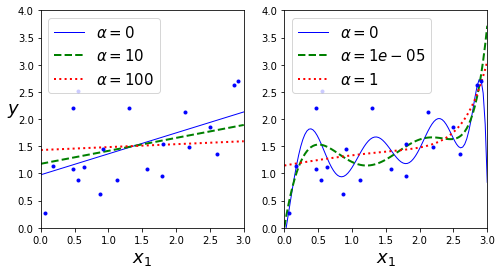

In [24]:
from sklearn.linear_model import Ridge
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

# A linear model (left) and a polynomial model (right), both with various levels of Ridge regularization
# Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions,
# thus reducing the model’s variance but increasing its bias.

<h1><center>Regularized Regression - LASSO Regression</center></h1>

**Equation 4-10: Lasso Regression cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$

<h1><center>Regularized Regression - Elastic Net</center></h1>

**Equation 4-12: Elastic Net cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$

<h1><center>Optimization Solution Using Gradient Descent</center></h1>

- **Gradient Descent** is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems.


- The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.


- Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope.


- This is exactly what **Gradient Descent** does: it measures the local gradient of the error function with regard to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!


- Concretely, you start by filling θ with random values (this is called **random initialization**). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

<h1><center>Gradient Descent</center></h1>

<center><img src="img/fig-4-3.png" align="center"/></center>

<font size=1>Image from Hands-On ML Textbook</font>

<h1><center>Gradient Descent - Learning Rate Too Small</center></h1>

<center><img src="img/learning-rate-small.png" align="center"/></center>

<font size=1>Image from Hands-On ML Textbook</font>

<h1><center>Gradient Descent - Learning Rate Too Large</center></h1>

<center><img src="img/learning-rate-large.png" align="center"/></center>

<font size=1>Image from Hands-On ML Textbook</font>

<h1><center>Gradient Descent - Pitfalls</center></h1>

<center><img src="img/gd-pitfalls.png" align="center"/></center>

<font size=1>Image from Hands-On ML Textbook</font>

<h1><center>GD and Convex Functions</center></h1>

- Fortunately, the MSE cost function for a Linear Regression model happens to be a **convex** function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve.


- This implies that there are no **local minima**, just one **global minimum**.


- It is also a continuous function with a slope that never changes abruptly. 


- These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum of MSE cost function if you wait long enough and if the learning rate is not too high.

<h1><center>Impact of Feature Scaling on GD</center></h1>

- In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Figure 4-7 shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

- As you can see, on the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

<center><img src="img/fig-4-7.png" align="center"/></center>

<font size=1>Image from Hands-On ML Textbook</font>

<h1><center>Gradient Descent - Math Notation</center></h1>

**Equation 4-3: MSE cost function for a Linear Regression model**

$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$


**Equation 4-5: Partial derivatives of the cost function**

$
\dfrac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}
$


<h1><center>Batch Gradient Descent</center></h1>

**Equation 4-6: Gradient vector of the cost function**

$
\nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\boldsymbol{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\boldsymbol{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\boldsymbol{\theta})
\end{pmatrix}
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$



**Equation 4-7: Gradient Descent step**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta})
$

<h1><center>Stochastic Gradient Descent</center></h1>

- The main problem with **Batch Gradient Descent** is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.


- At the opposite extreme, **Stochastic Gradient Descent** picks a random instance in the training set at every step and computes the gradients based only on that single instance.

<h1><center>SGD</center></h1>

<center><img src="img/fig-4-9.png" align="center"/></center>

<font size=1>Image from Hands-On ML Textbook</font>

<h1><center>Mini-Batch Gradient Descent</center></h1>

- At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches.


- The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

<h1><center>Gradient Descent - Animation Demos</center></h1>


https://www.deeplearning.ai/ai-notes/optimization/?utm_source=social&utm_medium=linkedin&utm_campaign=BlogAINotesOptimizationAugust272019

<h1><center>Early Stopping</center></h1>

- A very different way to **regularize** iterative learning algorithms such as **Gradient Descent** is to stop training as soon as the validation error reaches a minimum. This is called **Early Stopping**.


- With **early stopping** you just stop training as soon as the validation error reaches the minimum.


- It is such a simple and efficient regularization technique that Geoffrey Hinton called it a **"beautiful free lunch."**

In [12]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [28]:
from copy import deepcopy
from sklearn.linear_model import SGDRegressor
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

Text(0, 0.5, 'RMSE')

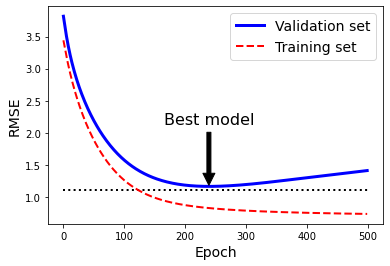

In [30]:
# Early Stopping Plot
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,)
best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

# The plot shows a complex model (in this case, a high-degree Polynomial Regression model)
# being trained with Batch Gradient Descent. As the epochs go by the algorithm learns,
# and its prediction error (RMSE) on the training set goes down,
# along with its prediction error on the validation set.
# After a while though, the validation error stops decreasing and starts to go back up.
# This indicates that the model has started to overfit the training data.
# With early stopping you just stop training as soon as the validation error reaches the minimum.

<h1><center>Can Regression Be Used for Classification?</center></h1>

- Yes! **Logistic Regression** can be used for classification.


- The idea is to apply a logistic function (e.g **sigmoid function**) to map the output of the regression model to a valid range for class probabilities, i.e. [0,1]

<h1><center>Logistic Regression</center></h1>

- **Logistic Regression** (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class e.g., what is the probability that this email is spam?


- If the estimated probability is greater than 0.50, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”).


- This makes **Logistic Regression** a **binary classifier**.


- So how does **Logistic Regression** work? Just like a Linear Regression model, a **Logistic Regression** model computes a **weighted sum** of the input features plus a bias term, but instead of outputting the result directly like the Linear Regression model does, it outputs the **logistic** of this result.

<h1><center>Logistic Regression - Estimating Class Probabilities</center></h1>


**Equation 4-13: Logistic Regression model estimated probability (vectorized form)**

$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\mathbf{x}^T \boldsymbol{\theta})
$


<h1><center>Logistic Function - Sigmoid</center></h1>

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

**Equation 4-14: Logistic function**

$
\sigma(t) = \dfrac{1}{1 + \exp(-t)}
$

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

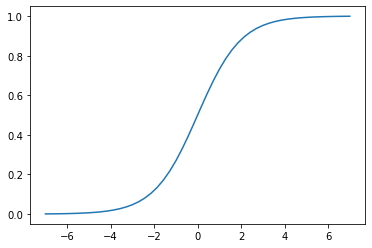

In [14]:
x = np.linspace(-7, 7, 50)
plt.plot(x, sigmoid(x))

In [21]:
sample = [0.5, 1, 2, 20, 2020]
sigmoid(sample[4])

1.0

<h1><center>Logistic Function - Sigmoid</center></h1>

<center><img src="img/logistic-function.png" align="center"/></center>

<font size=1>Image from Hands-on ML Textbook</font>

<h1><center>Logistic Regression Model Prediction</center></h1>

- Once the Logistic Regression model has estimated the probability $\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x})$ that an instance $x$ belongs to the positive class, it can make its prediction $\hat{y}$ easily (see Equation 4-15).

**Equation 4-15: Logistic Regression model prediction**

$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5 \\
  1 & \text{if } \hat{p} \geq 0.5
\end{cases}
$

- Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) ≥ 0.5$ when $t ≥ 0$, so a Logistic Regression model predicts 1 if $\mathbf{x}^T \boldsymbol{\theta}$ is positive and 0 if it is negative.

<h1><center>Logistic Regression - Cost Function for a Single Instance</center></h1>

**Equation 4-16: Cost function of a single training instance**

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$

- This cost function makes sense because $–log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance.


- On the other hand, $–log(t)$ is close to 0 when $t$ is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

<h1><center>Log Loss</center></h1>

- The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the log loss, shown in Equation 4-17.

**Equation 4-17: Logistic Regression cost function (log loss)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

- The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation).


- The good news is that this cost function is **convex**, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).

<h1><center>Logistic Regression - Softmax and Multi-class Classification</center></h1>

- The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called **Softmax Regression**, or **Multinomial Logistic Regression**.


- The idea is simple: when given an instance $x$, the **Softmax Regression** model first computes a score $s_{k (x)}$ for each class $k$, then estimates the probability of each class by applying the softmax function (also called the **normalized exponential**) to the scores.

**Equation 4-19: Softmax score for class k**

$
s_k(\mathbf{x}) = ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x}
$

- Note that each class has its own dedicated parameter vector $\boldsymbol{\theta}^{(k)}$. All these vectors are typically stored as rows in a parameter matrix $\boldsymbol{\Theta}$.

<h1><center>Logistic Regression - Softmax</center></h1>

<center><img src="img/logistic-softmax.png" align="center"/></center>

<font size=1>Image from MJ Lee (UNCC)</font>

<h1><center>Softmax Function</center></h1>

- Once you have computed the score of every class for the instance x, you can estimate the probability $\hat{p_k}$ that the instance belongs to class $k$ by running the scores through the softmax function (Equation 4-20).

- The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called **logits** or log-odds (although they are actually unnormalized log-odds).

**Equation 4-20: Softmax function**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

- In this equation:
    - $K$ is the number of classes.
    - $\mathbf{s}(\mathbf{x})$ is a vector containing the scores of each class for the instance $x$.
    - $\sigma\left(\mathbf{s}(\mathbf{x})\right)_k$ is the estimated probability that the instance $x$ belongs to class $k$, given the scores of each class for that instance.


<h1><center>Softmax Function</center></h1>

- Softmax function outputs class probabilities that sum to 1.0 hence is a good fit for multi-class classification.

$$
g(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$

In [22]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [17]:
x = np.arange(5) 
print(x)

[0 1 2 3 4]


In [18]:
y = softmax(x)
print(y)

[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


In [19]:
sum_y = y[0] + y[1] + y[2] + y[3] + y[4]
print(sum_y)

1.0


<h1><center>Softmax Regression Classifier Prediction</center></h1>

- Just like the Logistic Regression classifier, the **Softmax Regression** classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), as shown in Equation 4-21.

**Equation 4-21: Softmax Regression classifier prediction**

$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$

- The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma\left(\mathbf{s}(\mathbf{x})\right)_k$.

<h1><center>Cross Entropy Cost Function</center></h1>

- Now that you know how the model estimates probabilities and makes predictions, let’s take a look at training. 


- The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes).


- Minimizing the cost function shown in Equation 4-22 (next slide), called the **cross entropy**, should lead to this objective because it penalizes the model when it estimates a low probability for a target class.


- **Cross entropy** is frequently used to measure how well a set of estimated class probabilities matches the target classes.

**Equation 4-22: Cross entropy cost function**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

- In this equation:
    - $y_k^{(i)}$ is the target probability that the $i$-th instance belongs to class $k$. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.
    
- Notice that when there are just two classes ($K = 2$), this cost function is equivalent to the Logistic Regression’s cost function (**log loss**; see Equation 4-17).

- The gradient vector of this cost function with regard to θ (k) is given by Equation 4-23.

**Equation 4-23: Cross entropy gradient vector for class _k_**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$